In [1]:
import keras
import tensorflow as tf
import cv2
import random
import numpy as np
from imutils import paths

Using TensorFlow backend.


In [2]:
!pip install opencv-python
!pip install imutils

  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 28.2MB 19kB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/3a/5f/47e578b3ae79e2624e205445ab77a1848acdaa2929a00eeef6b16eaaeb20/numpy-1.16.6-cp27-cp27mu-manylinux1_x86_64.whl
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Running setup.py bdist_wheel for imutils ... done
  Stored in directory: /home/nakpisang/.cache/pip/wheels/16/84/1f/bf88641293cda2c8be81a5c4b8ca973dd9125a6dc3767417fd
Successfully built imutils


In [3]:
import os

data = []
labels = []
imagePaths = sorted(list(paths.list_images('rockpaperscissors/')))
random.seed(2)
random.shuffle(imagePaths)

for imagePath in imagePaths:
    img = cv2.imread(imagePath)
    img_flat = cv2.resize(img, (32,32)).flatten()
    data.append(img_flat)    
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

# ubah var data menjadi array numpy agar bisa dilakukan matrix manipulation    
lbl = np.array(labels)
dt = np.array(data, dtype='float32')
print('gambar loaded')

gambar loaded


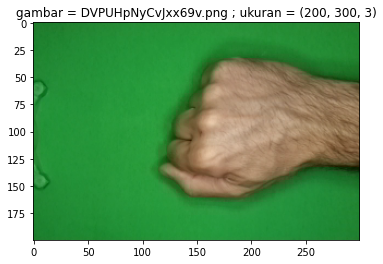

In [45]:
import matplotlib.pyplot as plt
gambar = imagePaths[1]
gbr = plt.imread(gambar)
plt.title('gambar = '+str(gambar.split('/')[3])+' ; ukuran = '+str(gbr.shape))
plt.imshow(gbr)

In [4]:
print('dimensi : ', dt.shape)
print()
print('jumlah gambar  : ', dt.shape[0])
print('Ukuran gambar  : ', dt.shape[1])
print()

dimensi :  (4376, 3072)

jumlah gambar  :  4376
Ukuran gambar  :  3072



In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dt, lbl, 
                                                    test_size=0.40, 
                                                    random_state=42)

print('x_train : ',x_train.shape)
print('x_test  : ', x_test.shape)
print('y_train : ', y_train.shape)
print('y_test  : ', y_test.shape)

x_train :  (2625, 3072)
x_test  :  (1751, 3072)
y_train :  (2625,)
y_test  :  (1751,)


In [19]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_encoded = lb.fit_transform(y_train)
y_test_encoded = lb.transform(y_test)
y_test_encoded

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [21]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [22]:
# import layer nya
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation='sigmoid', name='hidden_layer_1'))
model.add(Dense(512, activation='sigmoid', name='hidden_layer_2'))
model.add(Dense(3, name='output', activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 1024)              3146752   
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 512)               524800    
_________________________________________________________________
output (Dense)               (None, 3)                 1539      
Total params: 3,673,091
Trainable params: 3,673,091
Non-trainable params: 0
_________________________________________________________________


In [24]:
from keras.optimizers import SGD
opt = SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [25]:
my_model = model.fit(x_train, y_train_encoded, 
                     validation_data=(x_test, y_test_encoded),
                     batch_size=32, 
                     epochs=50)

Train on 2625 samples, validate on 1751 samples
Epoch 1/50
2625/2625 [==============================] - 29s 11ms/step - loss: 1.0680 - accuracy: 0.4876 - val_loss: 1.0336 - val_accuracy: 0.4523
Epoch 2/50
2625/2625 [==============================] - 13s 5ms/step - loss: 1.0037 - accuracy: 0.6884 - val_loss: 0.9991 - val_accuracy: 0.4991
Epoch 3/50
2625/2625 [==============================] - 13s 5ms/step - loss: 0.9710 - accuracy: 0.7463 - val_loss: 0.9711 - val_accuracy: 0.6545
Epoch 4/50
2625/2625 [==============================] - 13s 5ms/step - loss: 0.9463 - accuracy: 0.7726 - val_loss: 0.9388 - val_accuracy: 0.7807
Epoch 5/50
2625/2625 [==============================] - 13s 5ms/step - loss: 0.9212 - accuracy: 0.7893 - val_loss: 0.9282 - val_accuracy: 0.6882
Epoch 6/50
2625/2625 [==============================] - 13s 5ms/step - loss: 0.9022 - accuracy: 0.7973 - val_loss: 0.9031 - val_accuracy: 0.7584
Epoch 7/50
2625/2625 [==============================] - 13s 5ms/step - loss: 0.88

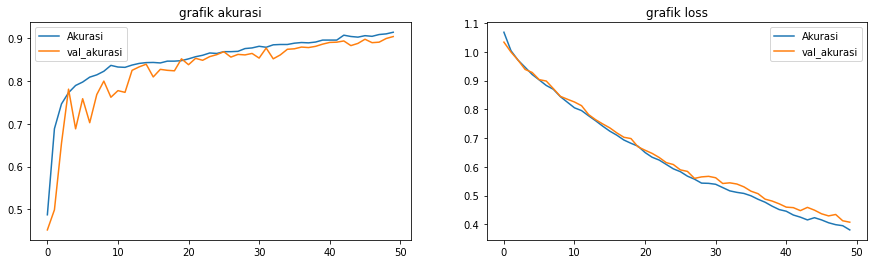

In [41]:
akurasi = my_model.history['accuracy']
val_akurasi = my_model.history['val_accuracy']

loss = my_model.history['loss']
val_loss = my_model.history['val_loss']

x = np.arange(len(akurasi))

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('grafik akurasi')
plt.plot(x, akurasi, label='Akurasi')
plt.plot(x, val_akurasi, label='val_akurasi')
plt.legend()

plt.subplot(1,2,2)
plt.title('grafik loss')
plt.plot(x, loss, label='Akurasi')
plt.plot(x, val_loss, label='val_akurasi')
plt.legend()

plt.show()

In [32]:
import pickle

model.save('model_sederhana.h5')
f = open('lable.pickle', 'wb')
f.write(pickle.dumps(lb))

462

In [42]:
prediksi = model.predict_classes(x_test)
b = np.expand_dims(x_test[0], axis = 0)
hasil_pred = model.predict(b)
lb.classes_[np.argmax(hasil_pred, axis=1)[0]]

'paper'

In [44]:
from sklearn.metrics import classification_report
loss = model.evaluate(x_test, y_test_encoded)[0]
akurasi = model.evaluate(x_test, y_test_encoded)[1]
print()
print('loss : %.2f%%' % loss)
print('akurasi    : %.2f%%' % akurasi)
print()
print(classification_report(y_test_encoded.argmax(axis = 1), prediksi))

1751/1751 [==============================] - 3s 2ms/step

loss : 0.41%
akurasi    : 0.90%

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       573
           1       0.95      0.87      0.91       595
           2       0.84      0.97      0.90       583

    accuracy                           0.90      1751
   macro avg       0.91      0.90      0.90      1751
weighted avg       0.91      0.90      0.90      1751



In [51]:
from keras.models import load_model
import os

In [54]:
model = load_model('model_sederhana.h5')
# lb = pickle.loads(open('lable.pickle', 'rb').read())
# print('Input NN : ',model.input.shape)
# print(model.summary())

In [55]:
lb = pickle.loads(open('lable.pickle', 'rb').read())

In [56]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 1024)              3146752   
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 512)               524800    
_________________________________________________________________
output (Dense)               (None, 3)                 1539      
Total params: 3,673,091
Trainable params: 3,673,091
Non-trainable params: 0
_________________________________________________________________
None


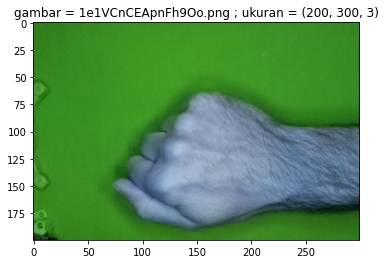

In [65]:
file_gbr = 'rockpaperscissors/rock/1e1VCnCEApnFh9Oo.png'
gbr = cv2.imread(file_gbr)
plt.title('gambar = '+str(file_gbr.split('/')[2])+' ; ukuran = '+str(gbr.shape))
plt.imshow(gbr)

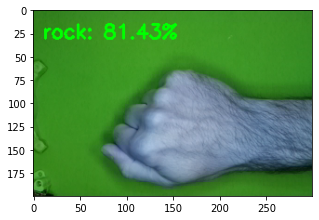

In [66]:
img = gbr.copy()
output = img.copy()
img = cv2.resize(img, (32,32)).flatten()
img_2 = img.reshape([1, 3072])
pred = model.predict(img_2)

i = pred.argmax(axis = 1)[0]
label_class = lb.classes_[i]

text = "{}: {:.2f}%".format(label_class, pred[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# tampilkan gambar

plt.figure(figsize=[5,5])
plt.imshow(output)